In [2]:
## IMport libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_excel
from pandas import read_csv
from numpy import percentile
import itertools
from matplotlib.backends.backend_pdf import PdfPages
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
from scipy import stats
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [3]:
df6=pd.read_csv('Combined_data_All_variable_clean_Hourly.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data7=df6.copy()

In [4]:
## Function for changing data type to numric
def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [5]:
NumericDtype(data7)

In [6]:
data7.isnull().sum()

FGO TK1551 Level Ctr PV - mm                             8723
FGO TK1552 Level Ctr PV - mm                             9084
FGO TK1553 Level Ctr PV - mm                             8737
FGO TK1554 Level Ctr PV - mm                             8723
FGO TK1555 Level Ctr PV - mm                             8775
TK1551 Air Blower Flow Loop PV - m3/h                    9542
TK1552 Air Blower Flow Loop PV - m3/h                    9521
TK1553 Air Blower Flow Loop PV - m3/h                    9527
TK1554 Air Blower Flow Loop PV - m3/h                    9527
TK1555 Air Blower Flow Loop PV - m3/h                    9528
FGO Mass Pull % PV - %                                  10448
TK1551 VELOCITY TO AIR CTRL PV - m3/hr                   9976
TK1552 VELOCITY TO AIR CTRL PV - mm/s                    9973
TK1553 VELOCITY TO AIR CTRL PV - mm/s                   10004
TK1554 VELOCITY TO AIR CTRL PV - mm/s                   10053
TK1555 VELOCITY TO AIR CTRL PV - mm/s                    9985
TK1551 F

In [42]:
X.dropna(inplace=True)

In [44]:
X.to_csv('Data1.csv')

In [43]:
X.isnull().sum()

FGO TK1551 Level Ctr PV - mm                        0
TK1551 Air Blower Flow Loop PV - m3/h               0
TK1551 Froth Bubble Diameter - mm                   0
TK1551 VELOCITY TO AIR CTRL PV - m3/hr              0
FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H    0
FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H    0
FROTHER  Flow to TK1551 Controller PV -  L/H        0
FGO Mass Pull % PV - %                              0
dtype: int64

In [22]:
X.head()

,FGO TK1551 Level Ctr PV - mm,TK1551 Air Blower Flow Loop PV - m3/h,TK1551 Froth Bubble Diameter - mm,TK1551 VELOCITY TO AIR CTRL PV - m3/hr,FROTHER Flow 1 to TK1551/2 Controller PV - L/H,FROTHER Flow 2 to TK1551/2 Controller PV - L/H,FROTHER Flow to TK1551 Controller PV - L/H
2018-10-10 00:00:00,81.791866,716.232534,15.075526,48.331473,0.011719,12.631193,1.558782
2018-10-10 01:00:00,104.327242,779.643002,20.060375,49.056414,0.011719,12.294527,2.668106
2018-10-10 02:00:00,113.676346,808.844379,21.019962,52.774837,0.011719,8.992220,2.266781
2018-10-10 03:00:00,108.712033,863.012172,23.260170,65.484484,0.011719,8.226218,2.311318
2018-10-10 04:00:00,160.702830,829.644171,23.322708,57.562375,0.011719,6.782229,3.194128


In [41]:
X=data7[['FGO TK1551 Level Ctr PV - mm','TK1551 Air Blower Flow Loop PV - m3/h','TK1551 Froth Bubble Diameter - mm','TK1551 VELOCITY TO AIR CTRL PV - m3/hr','FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H',
       'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
       'FROTHER  Flow to TK1551 Controller PV -  L/H','FGO Mass Pull % PV - %']]

In [30]:
new=data7[['FGO TK1551 Level Ctr PV - mm','TK1551 Air Blower Flow Loop PV - m3/h','TK1551 Froth Bubble Diameter - mm','TK1551 VELOCITY TO AIR CTRL PV - m3/hr','FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H',
       'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
       'FROTHER  Flow to TK1551 Controller PV -  L/H','FGO Mass Pull % PV - %']]

In [31]:
new.to_csv('Data.csv')

In [19]:
y=data7[['FGO Mass Pull % PV - %']]

In [17]:
data_u=data7[['TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'PAX Flow to TK1552/3 Controller PV -  L/H',
       'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
       'FGO Conc Flow Controller PV -  m3/hr', 'FGO TK1551 Level Ctr PV - mm',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'Rougher to Float Flow Ctrl PV - m3/h',
       'Rougher to Flotation Feed Density  - %',
       'FGO TK1552 Level Ctr PV - mm', 'FGO TK1553 Level Ctr PV - mm','FGO Mass Pull % PV - %']]

In [22]:
data_u.isnull().sum()

TK1552 VELOCITY TO AIR CTRL PV - mm/s               0
PAX Flow to TK1552/3 Controller PV -  L/H           0
FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H    0
FGO Conc Flow Controller PV -  m3/hr                0
FGO TK1551 Level Ctr PV - mm                        0
TK1552 Froth Bubble Diameter - mm                   0
TK1552 Air Blower Flow Loop PV - m3/h               0
Rougher to Float Flow Ctrl PV - m3/h                0
Rougher to Flotation Feed Density  - %              0
FGO TK1552 Level Ctr PV - mm                        0
FGO TK1553 Level Ctr PV - mm                        0
FGO Mass Pull % PV - %                              0
dtype: int64

In [21]:
data_u.dropna(inplace=True)

In [23]:
data_u.to_csv('Ultimate_Data.csv')

In [11]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [12]:
data7.columns

Index(['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm', 'FGO TK1554 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm', 'TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h', 'FGO Mass Pull % PV - %',
       'TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1551 Froth Bubble Diameter - mm',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm', 'pH Indication for FGO - PV -  pH',
       'FGO FLTS FD TNK DNSTY CONTROL MEAS -  %(PS)',
       'Collector Added To TK1550 PV -  m3/h',
       'FGO FLTS FD TNK WTR FLW CONTROL MEAS -  m3

In [23]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6
count,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03
mean,1.542524e-16,8.336411e-16,-2.856883e-16,2.898115e-16,9.398067e-16,1.268826e-16,-3.470554e-17
std,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00
min,-2.435484e+00,-3.693262e+00,-3.576613e+00,-2.705658e+00,-3.796706e-01,-2.258410e+00,-1.732272e+00
25%,-5.111980e-01,-6.899624e-01,-6.725997e-01,-5.005409e-01,-3.717043e-01,-7.458441e-01,-8.051366e-01
50%,-2.552446e-01,1.889796e-01,2.117456e-02,1.543698e-01,-3.680676e-01,-6.009186e-02,-9.352083e-02
75%,2.892499e-01,9.329193e-01,6.787137e-01,6.561435e-01,-3.645783e-01,5.858863e-01,7.383163e-01
max,3.702210e+00,2.298239e+00,3.213172e+00,2.689195e+00,6.042038e+00,2.951618e+00,3.358496e+00


Text(0, 0.5, 'Inertia')

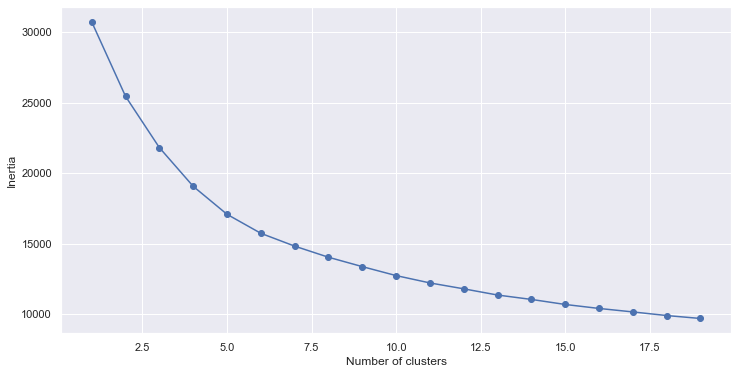

In [24]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
model=kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [26]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    1597
0    1283
3    1228
2     281
Name: cluster, dtype: int64

In [27]:
frame.head()

,0,1,2,3,4,5,6,cluster
0,-0.846107,-0.021389,-0.595756,-1.504196,-0.371704,-0.171759,-1.417209,0
1,-0.383453,0.458927,0.879017,-1.477978,-0.371704,-0.237926,-0.788103,1
2,-0.191514,0.680119,1.162912,-1.343501,-0.371704,-0.886947,-1.015697,1
3,-0.293432,1.090425,1.825681,-0.883853,-0.371704,-1.037494,-0.990440,1
4,0.773945,0.837672,1.844182,-1.170358,-0.371704,-1.321289,-0.489791,1


ValueError: x and y must be the same size

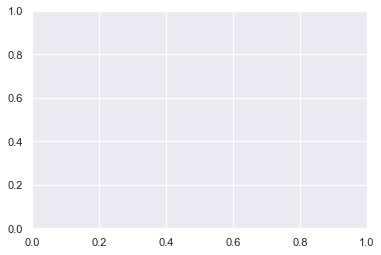

In [42]:
plt.scatter(frame['cluster'].index,y,c=model.labels_.astype(float))

In [ ]:
pd.plotting.parallel_coordinates(frame, 'cluster')

In [28]:
frame.to_csv('Kmeans_Ultimate_1.csv')

In [ ]:
data7.isnull().sum()

In [ ]:
data7.to_csv('No_Null.csv')

In [32]:
df8=pd.read_csv('Data.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data9=df8.copy()

In [ ]:
data9[data9['cluster']==0].describe().to_csv('Cluster0.csv')

In [33]:
df10=pd.read_csv('Ultimate_Data.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data11=df10.copy()

In [38]:
data11[data11['cluster']==4].describe().to_csv('Cluster4.csv')

# Hierrachial K-Means

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [45]:
df6=pd.read_csv('Data1.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data7=df6.copy()

In [47]:
## Function for changing data type to numric
def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [48]:
NumericDtype(data7)

In [49]:
data7.isnull().sum()

FGO TK1551 Level Ctr PV - mm                            10642
FGO TK1552 Level Ctr PV - mm                            11021
FGO TK1553 Level Ctr PV - mm                            10648
FGO TK1554 Level Ctr PV - mm                            10642
FGO TK1555 Level Ctr PV - mm                            10704
TK1551 Air Blower Flow Loop PV - m3/h                   10665
TK1552 Air Blower Flow Loop PV - m3/h                   10647
TK1553 Air Blower Flow Loop PV - m3/h                   10647
TK1554 Air Blower Flow Loop PV - m3/h                   10665
TK1555 Air Blower Flow Loop PV - m3/h                   10649
FGO Mass Pull % PV - %                                  10642
TK1552 VELOCITY TO AIR CTRL PV - mm/s                   10689
TK1553 VELOCITY TO AIR CTRL PV - mm/s                   10700
TK1554 VELOCITY TO AIR CTRL PV - mm/s                   10775
TK1555 VELOCITY TO AIR CTRL PV - mm/s                   10770
TK1551 Froth Bubble Diameter - mm                       10658
TK1552 F

In [141]:
X=data7[['TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'PAX Flow to TK1552/3 Controller PV -  L/H',
       'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
       'FGO TK1552 Level Ctr PV - mm','FGO Mass Pull % PV - %']]

In [142]:
X.dropna(inplace=True)

In [143]:
X.to_csv('Agg_O.csv')

In [51]:
y=data7[['FGO Mass Pull % PV - %']]

In [52]:
data_u=data7[['TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'PAX Flow to TK1552/3 Controller PV -  L/H',
       'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
       'FGO Conc Flow Controller PV -  m3/hr', 'FGO TK1551 Level Ctr PV - mm',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'Rougher to Float Flow Ctrl PV - m3/h',
       'Rougher to Flotation Feed Density  - %',
       'FGO TK1552 Level Ctr PV - mm', 'FGO TK1553 Level Ctr PV - mm','FGO Mass Pull % PV - %']]

In [128]:
X.dropna(inplace=True)

In [144]:
from sklearn.preprocessing import normalize 
data_scaled = normalize(X) 
data_scaled = pd.DataFrame(data_scaled, columns=X.columns) 
data_scaled.head() 

,TK1552 VELOCITY TO AIR CTRL PV - mm/s,PAX Flow to TK1552/3 Controller PV - L/H,FROTHER Flow 2 to TK1551/2 Controller PV - L/H,FGO TK1552 Level Ctr PV - mm,FGO Mass Pull % PV - %
0,0.173340,0.057902,0.024617,0.974331,0.129123
1,0.195759,0.058967,0.024572,0.971096,0.120703
2,0.205947,0.061469,0.023830,0.969410,0.116121
3,0.212601,0.054212,0.021988,0.968227,0.117961
4,0.253204,0.064749,0.026789,0.958352,0.111981


In [145]:
from sklearn.cluster import AgglomerativeClustering 
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')   
pred=cluster.fit_predict(data_scaled) 

In [146]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    1105
1    1070
0     873
3     291
4     284
Name: cluster, dtype: int64

In [147]:
frame.head()

,TK1552 VELOCITY TO AIR CTRL PV - mm/s,PAX Flow to TK1552/3 Controller PV - L/H,FROTHER Flow 2 to TK1551/2 Controller PV - L/H,FGO TK1552 Level Ctr PV - mm,FGO Mass Pull % PV - %,cluster
0,0.173340,0.057902,0.024617,0.974331,0.129123,2
1,0.195759,0.058967,0.024572,0.971096,0.120703,2
2,0.205947,0.061469,0.023830,0.969410,0.116121,2
3,0.212601,0.054212,0.021988,0.968227,0.117961,2
4,0.253204,0.064749,0.026789,0.958352,0.111981,2


In [148]:
frame.to_csv('Agg_Clustering.csv')

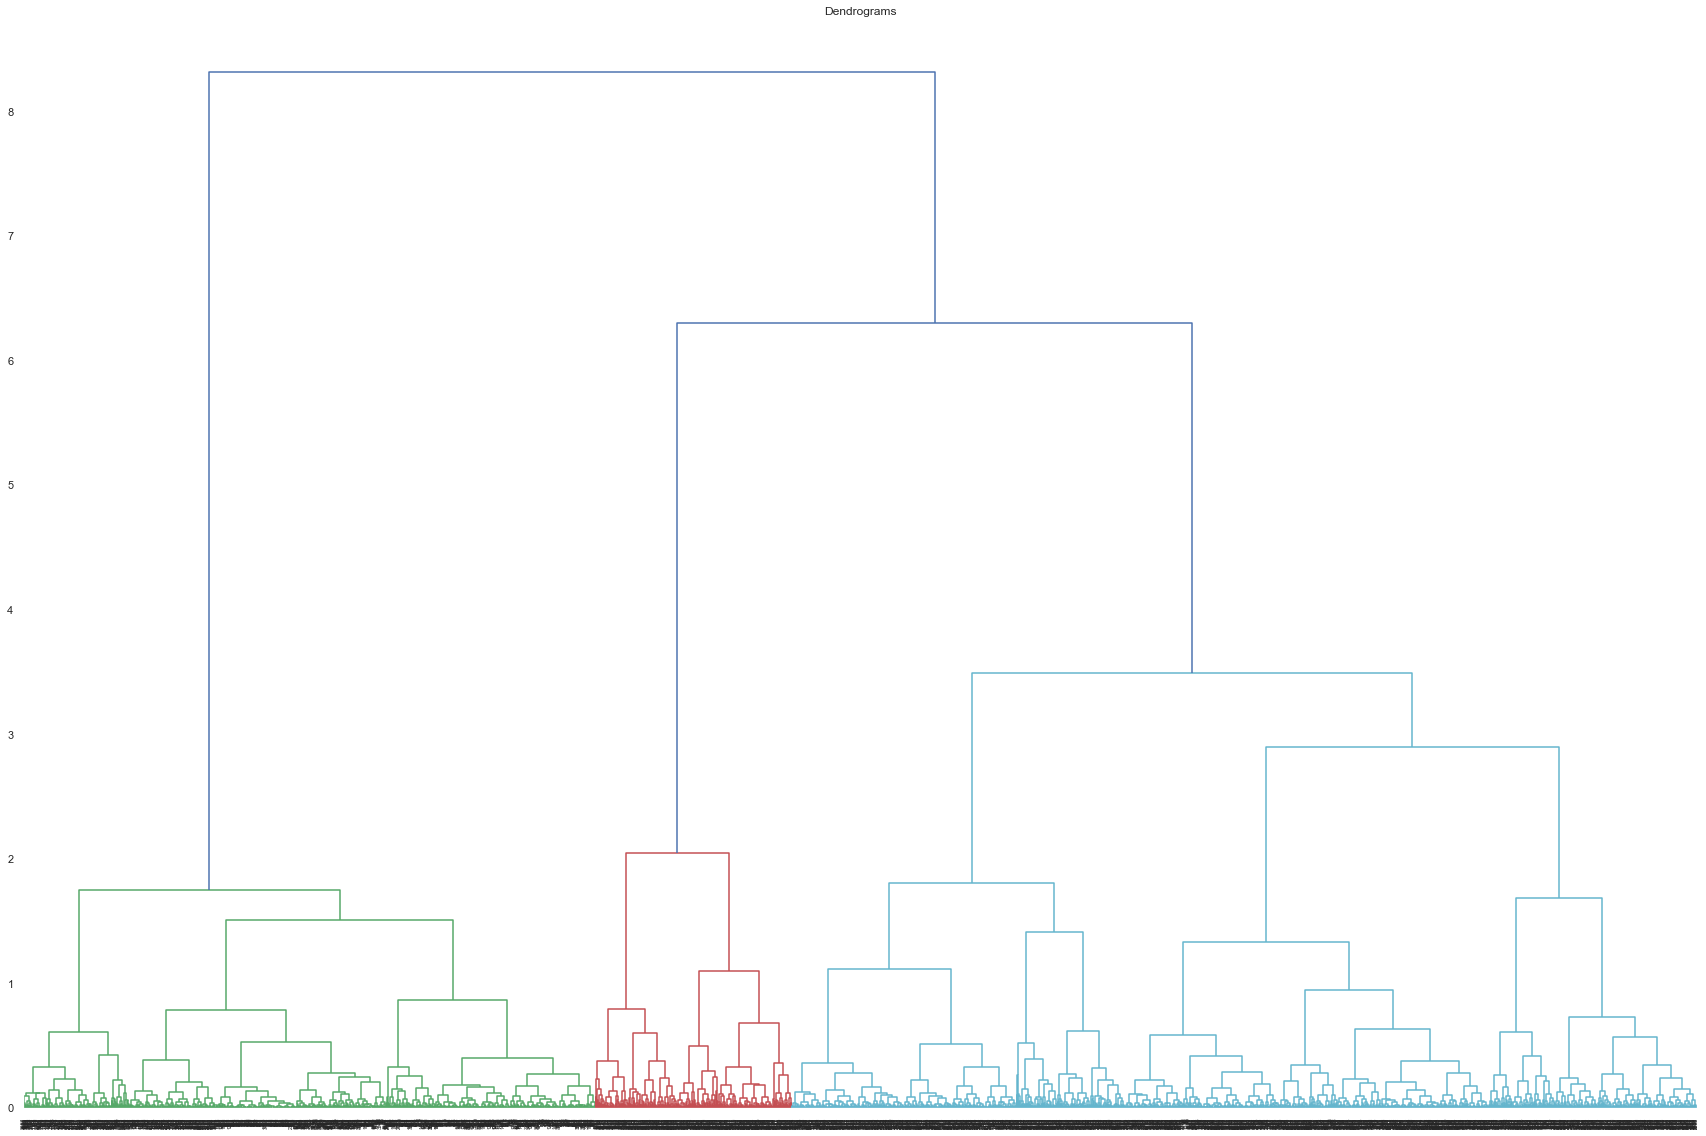

In [84]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(30, 20))   
plt.title("Dendrograms")   
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward')) 


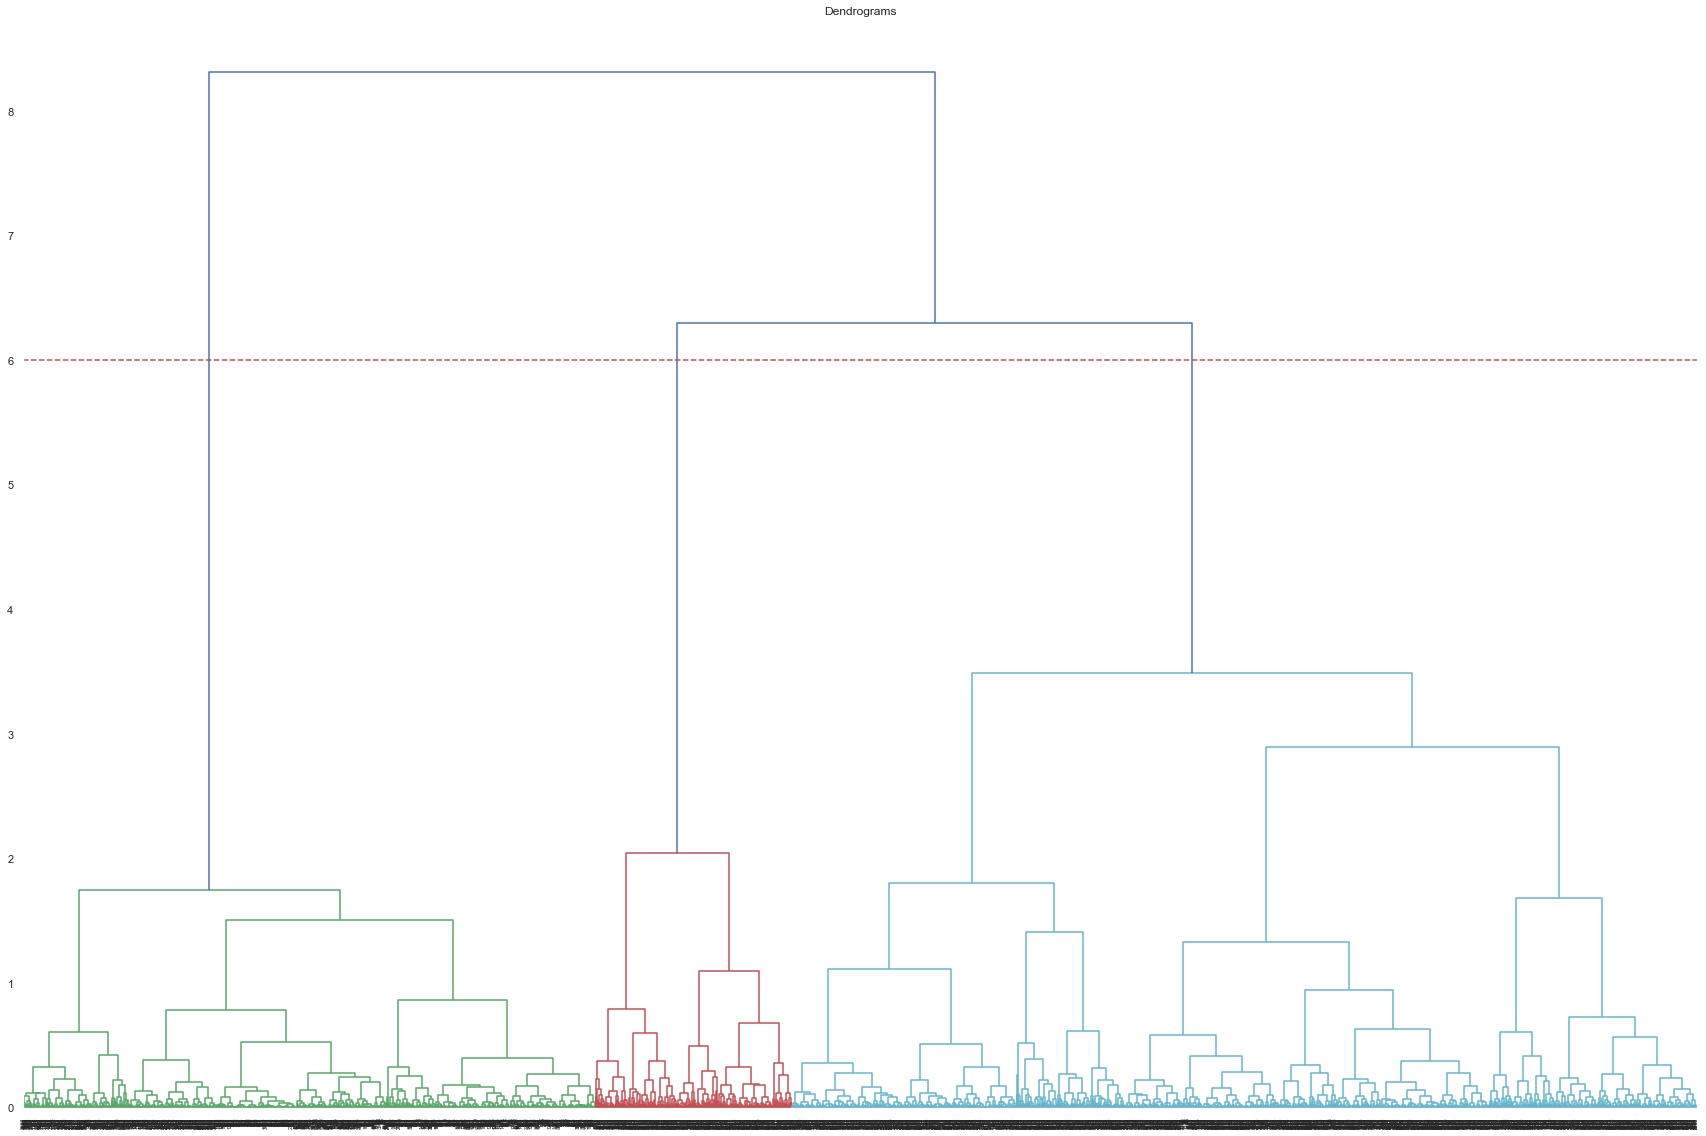

In [85]:
plt.figure(figsize=(30, 20))   
plt.title("Dendrograms")   
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward')) 
plt.axhline(y=6, color='r', linestyle='--') 

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [125.0, 125.0, 135.0, 135.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [282.5, 282.5, 313.75, 313.75],
  [265.0, 265.0, 298.125, 298.125],
  [385.0, 385.0, 395.0, 395.0],
  [435.0, 435.0, 445.0, 445.0],
  [455.0, 455.0, 465.0, 465.0],
  [440.0, 440.0, 460.0, 460.0],
  [495.0, 495.0, 505.0, 505.0],
  [515.0, 515.0, 525.0, 525.0],
  [545.0, 545.0, 555.0, 555.0],
  [575.0, 575.0, 585.0, 585.0],
  [615.0, 615.0, 625.0, 625.0],
  [685.0, 685.0, 695.0, 695.0],
  [735.0, 735.0, 745.0, 745.0],
  [725.0, 725.0, 740.0, 740.0],
  [765.0, 765.0, 775.0, 775.0],
  [785.0, 785.0, 795.0, 795.0],
  [805.0, 805.0, 815.0, 815.0],
  [790.0, 790.0, 810.0, 810.0],
  [770.0, 770.0, 800.0, 800.0],
  [755.0, 755.0, 785.0, 785.0],
  [835.0, 835.0, 845.0, 845.0],
  [875.0, 875.0, 885.0, 885.0],
  [955.0, 955.0, 965.0, 965.0],
  [945.0, 945.0, 960.0, 960.

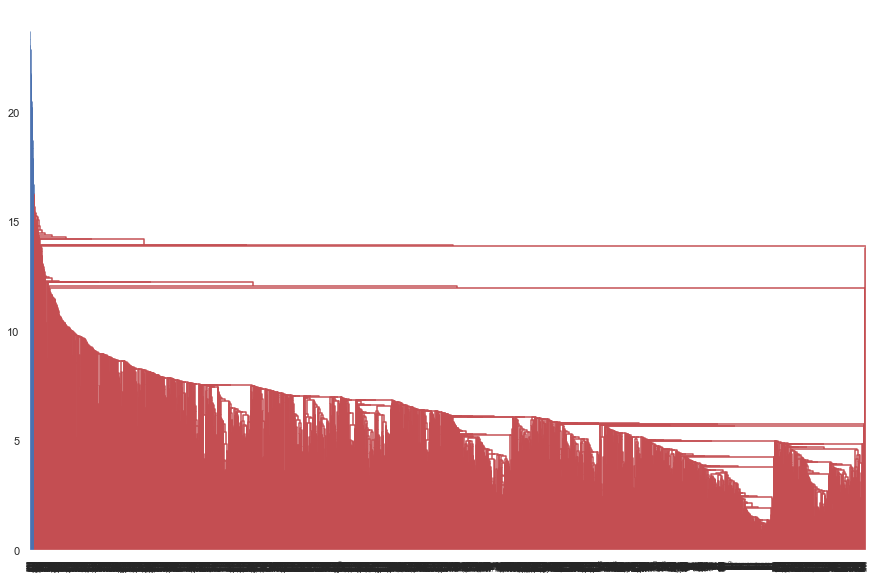

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)

In [94]:
X.dropna(inplace=True).to_csv('Agg_Original.csv')

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [149]:
data_m=pd.read_csv('Agg_O.csv',header=0, index_col=0, parse_dates=True, squeeze=True)

In [150]:
data_copy=data_m.copy()

In [151]:
data_copy.head()

,TK1552 VELOCITY TO AIR CTRL PV - mm/s,PAX Flow to TK1552/3 Controller PV - L/H,FROTHER Flow 2 to TK1551/2 Controller PV - L/H,FGO TK1552 Level Ctr PV - mm,FGO Mass Pull % PV - %,cluster
Date_time,,,,,,
2018-11-02 04:00:00,53.030048,17.714102,7.531135,298.077784,39.502591,2
2018-11-02 05:00:00,59.947428,18.057500,7.524721,297.379138,36.962831,2
2018-11-02 06:00:00,63.013400,18.807673,7.291313,296.609990,35.529514,2
2018-11-02 07:00:00,64.987064,16.571299,6.721364,295.964439,36.057996,2
2018-11-02 08:00:00,79.670134,20.373159,8.428946,301.543290,35.234549,2


In [46]:
a=data7[data7['cluster']==0].describe().loc[['min','max']]
b=data7[data7['cluster']==1].describe().loc[['min','max']]
c=data7[data7['cluster']==2].describe().loc[['min','max']]
d=data7[data7['cluster']==3].describe().loc[['min','max']]
e=data7[data7['cluster']==4].describe().loc[['min','max']]

In [47]:
g=data7['FGO Mass Pull % PV - %'][data7['cluster']==0].describe().loc[['mean']]
h=data7['FGO Mass Pull % PV - %'][data7['cluster']==1].describe().loc[['mean']]
i=data7['FGO Mass Pull % PV - %'][data7['cluster']==2].describe().loc[['mean']]
j=data7['FGO Mass Pull % PV - %'][data7['cluster']==3].describe().loc[['mean']]
k=data7['FGO Mass Pull % PV - %'][data7['cluster']==4].describe().loc[['mean']]

In [48]:
data_frames1=[a,b,c,d,e]
final_df=pd.concat(data_frames1, axis=0)


In [49]:
final_df

,FGO TK1551 Level Ctr PV - mm,TK1551 Air Blower Flow Loop PV - m3/h,TK1551 Froth Bubble Diameter - mm,TK1551 VELOCITY TO AIR CTRL PV - m3/hr,FROTHER Flow 1 to TK1551/2 Controller PV - L/H,FROTHER Flow 2 to TK1551/2 Controller PV - L/H,FROTHER Flow to TK1551 Controller PV - L/H,FGO Mass Pull % PV - %,cluster
min,48.465237,306.714854,5.000000,15.383522,0.009375,2.014033,1.003221,25.019583,0.0
max,299.557034,1022.465625,27.208838,164.282340,1.561787,27.739315,9.979940,72.519157,0.0
min,4.375092,312.110566,5.000000,16.297516,0.009375,2.077641,1.003221,25.256689,1.0
max,301.463084,906.349871,27.733333,162.138397,1.561787,27.885247,9.580335,69.226184,1.0
min,86.273526,467.202263,6.107143,16.742303,0.013641,3.765760,1.078065,26.273605,2.0
max,272.624608,850.123758,27.031309,144.570535,1.898704,22.836817,9.486645,71.098803,2.0
min,46.715338,391.440424,7.107143,15.811629,0.009375,2.059947,1.038179,25.635714,3.0
max,302.414657,900.109777,27.950000,156.998129,1.561787,28.523353,9.519031,69.478212,3.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
dataframes2=[g,h,i,j,k]
final_df_1=pd.concat(dataframes2,axis=0)

In [51]:
final_df_1

mean    44.291879
mean    46.286523
mean    49.147000
mean    48.172090
mean          NaN
Name: FGO Mass Pull % PV - %, dtype: float64

In [52]:
df=[final_df,final_df_1]

In [53]:
final=pd.concat(df,axis=0)

In [54]:
final.to_excel("K-M.xlsx")